### P.E.T.E.R  son of S.T.E.V.E not Parker

In [32]:
import nltk
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import pandas as pd

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from pandas import DataFrame

### Load File

In [2]:
fileref = open('SW_All.txt', 'r', encoding="utf8")
star_wars = fileref.read()
#fileref.close()

In [3]:
#star_wars

### Make words lower case

In [4]:
star_wars = star_wars.lower()

In [5]:
#star_wars

### Remove symbols and numbers

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
string.digits

'0123456789'

In [8]:
star_wars="".join([char for char in star_wars if char not in string.punctuation and char not in string.digits])

In [9]:
#star_wars

### Remove possible links

In [10]:
star_wars = re.sub(r'http\S+', '', star_wars)

In [11]:
#star_wars

### Remove stop words & tokenize

In [12]:
stop_words = stopwords.words('english')

In [13]:
stop_words.append('�')

In [14]:
otherlist = ["’","i'll","you'll","he'll","she'll","it'll","we'll","they'll",
                 "i've","you've","he've","she've","it've","we've","they've",
                 "i'd","you'd","he'd","she'd","it'd","we'd","they'd", "i'm"]
    
    

In [15]:
for i in otherlist:
    stop_words.append(i)

In [16]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
star_wars = word_tokenize(star_wars)
print('# of words before filtering: ', len(star_wars))

# of words before filtering:  177676


In [18]:
filtered_words = [word for word in star_wars if word not in stop_words]

In [37]:
filtered_df = DataFrame(filtered_words,columns=['words'])
filtered_df.to_csv('filtered_df.csv')

In [38]:
print('# of words after filtering: ', len(filtered_words))
print('Loss Percentage: ', "{:.2f}".format((100-(len(filtered_words)/len(star_wars))*100)))

# of words after filtering:  103759
Loss Percentage:  41.60


In [39]:
my_dict = {}
for i in filtered_words:
    if i not in my_dict:
        my_dict[i] = 1
    else:
        my_dict[i] = my_dict[i] + 1
        
my_list = []        
for i in my_dict:
    my_list.append([i, my_dict[i]])

#print(sorted(my_list))

def Sort(sub_li): 
  
    sub_li.sort(key = lambda x: x[1], reverse=True)
    
    return sub_li 

Sort(my_list)

for i in my_list:
    print(i)

occurr = {1:0, 2:0, 4:0, 8:0, 16:0, 32:0, 64:0, 128:0, 256:0, 512:0, 1024:0, 1025:0}
percent = {}

for i in my_list:
    if i[1] == 1:
        occurr[1] = occurr[1] + 1
    elif i[1] == 2:
        occurr[2] = occurr[2] + 1
    elif i[1] <= 4:
        occurr[4] = occurr[4] + 1
    elif i[1] <= 8:
        occurr[8] = occurr[8] + 1    
    elif i[1] <= 16:
        occurr[16] = occurr[16] + 1
    elif i[1] <= 32:
        occurr[32] = occurr[32] + 1  
    elif i[1] <= 64:
        occurr[64] = occurr[64] + 1
    elif i[1] <= 128:
        occurr[128] = occurr[128] + 1  
    elif i[1] <= 256:
        occurr[256] = occurr[256] + 1
    elif i[1] <= 512:
        occurr[512] = occurr[512] + 1
    elif i[1] <= 1024:
        occurr[1024] = occurr[1024] + 1
    elif i[1] >= 1025:
        occurr[1025] = occurr[1025] + 1 

for i in occurr:
    percent[str(i)] = float("{:.2f}".format((occurr[i] / len(my_list))*100))

['anakin', 1597]
['obiwan', 1180]
['han', 818]
['rey', 818]
['luke', 754]
['finn', 736]
['jedi', 588]
['jar', 582]
['one', 521]
['poe', 514]
['im', 490]
['back', 484]
['day', 484]
['dont', 461]
['int', 454]
['get', 437]
['ship', 427]
['quigon', 421]
['leia', 417]
['know', 403]
['padme', 402]
['threepio', 373]
['palpatine', 357]
['see', 352]
['padmé', 348]
['right', 343]
['go', 340]
['yoda', 339]
['going', 336]
['us', 335]
['come', 325]
['artoo', 322]
['ext', 319]
['kylo', 306]
['master', 304]
['droid', 299]
['well', 295]
['ren', 291]
['droids', 278]
['two', 271]
['looks', 269]
['take', 268]
['youre', 268]
['general', 267]
['force', 261]
['like', 260]
['away', 251]
['time', 250]
['vader', 249]
['around', 247]
['got', 237]
['way', 236]
['chewie', 236]
['yes', 226]
['look', 226]
['oh', 226]
['jyn', 225]
['must', 220]
['battle', 218]
['think', 216]
['cassian', 216]
['good', 215]
['bb', 213]
['captain', 203]
['turns', 198]
['need', 193]
['sir', 192]
['cant', 190]
['cpo', 190]
['naboo', 186]

In [42]:
word_count = DataFrame(my_list,columns=['Word','Frequency'])
word_count.to_csv('word_count.csv')

In [43]:
len(my_list)

10585

In [44]:
occurr

{1: 4708,
 2: 1648,
 4: 1327,
 8: 1052,
 16: 731,
 32: 496,
 64: 321,
 128: 179,
 256: 77,
 512: 36,
 1024: 8,
 1025: 2}

In [47]:
frequency = pd.DataFrame(list(occurr.items()),columns = ['Frequency','Total'])
frequency.to_csv('frequency.csv')

In [23]:
percent

{'1': 44.48,
 '2': 15.57,
 '4': 12.54,
 '8': 9.94,
 '16': 6.91,
 '32': 4.69,
 '64': 3.03,
 '128': 1.69,
 '256': 0.73,
 '512': 0.34,
 '1024': 0.08,
 '1025': 0.02}

In [50]:
percentage = pd.DataFrame(list(percent.items()),columns = ['Frequency','Percentage'])
percentage.to_csv('percentage.csv')

<BarContainer object of 12 artists>

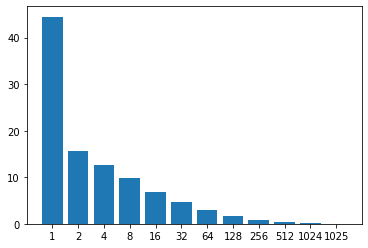

In [24]:
keys = percent.keys()
values = percent.values()

plt.bar(keys, values)

### Transform in stem(root) words

In [25]:
porter = PorterStemmer()

In [26]:
stemmed_words = [porter.stem(word) for word in filtered_words]

In [27]:
stemmed_words

['turmoil',
 'engulf',
 'galact',
 'republ',
 'taxat',
 'trade',
 'rout',
 'outlay',
 'star',
 'system',
 'disput',
 'hope',
 'resolv',
 'matter',
 'blockad',
 'deadli',
 'battleship',
 'greedi',
 'trade',
 'feder',
 'stop',
 'ship',
 'small',
 'planet',
 'naboo',
 'congress',
 'republ',
 'endlessli',
 'debat',
 'alarm',
 'chain',
 'event',
 'suprem',
 'chancellor',
 'secretli',
 'dispatch',
 'two',
 'jedi',
 'knight',
 'guardian',
 'peac',
 'justic',
 'galaxi',
 'settl',
 'conflict',
 'pan',
 'reveal',
 'small',
 'space',
 'cruiser',
 'head',
 'toward',
 'camera',
 'great',
 'speed',
 'pan',
 'cruiser',
 'head',
 'towardth',
 'beauti',
 'green',
 'planet',
 'naboo',
 'surround',
 'hundr',
 'trade',
 'feder',
 'battleship',
 'int',
 'republ',
 'cruiser',
 'cockpit',
 'cockpit',
 'cruis',
 'captain',
 'pilot',
 'maneuv',
 'closer',
 'one',
 'battleship',
 'quigon',
 'screen',
 'voic',
 'captain',
 'captain',
 'turn',
 'unseen',
 'figur',
 'sit',
 'behind',
 'captain',
 'ye',
 'sir',
 'q

### Visualize the word family

In [28]:
pos = pos_tag(filtered_words)
pos

[('turmoil', 'NN'),
 ('engulfed', 'VBD'),
 ('galactic', 'JJ'),
 ('republic', 'JJ'),
 ('taxation', 'NN'),
 ('trade', 'NN'),
 ('routes', 'NNS'),
 ('outlaying', 'VBG'),
 ('star', 'NN'),
 ('systems', 'NNS'),
 ('dispute', 'VBP'),
 ('hoping', 'VBG'),
 ('resolve', 'NN'),
 ('matter', 'NN'),
 ('blockade', 'VBD'),
 ('deadly', 'RB'),
 ('battleships', 'JJ'),
 ('greedy', 'NN'),
 ('trade', 'NN'),
 ('federation', 'NN'),
 ('stopped', 'VBD'),
 ('shipping', 'VBG'),
 ('small', 'JJ'),
 ('planet', 'NN'),
 ('naboo', 'JJ'),
 ('congress', 'NN'),
 ('republic', 'VBD'),
 ('endlessly', 'RB'),
 ('debates', 'VBZ'),
 ('alarming', 'VBG'),
 ('chain', 'NN'),
 ('events', 'NNS'),
 ('supreme', 'JJ'),
 ('chancellor', 'NN'),
 ('secretly', 'RB'),
 ('dispatched', 'VBD'),
 ('two', 'CD'),
 ('jedi', 'NN'),
 ('knights', 'NNS'),
 ('guardians', 'NNS'),
 ('peace', 'VBP'),
 ('justice', 'NN'),
 ('galaxy', 'NN'),
 ('settle', 'VB'),
 ('conflict', 'NN'),
 ('pan', 'NN'),
 ('reveal', 'VBP'),
 ('small', 'JJ'),
 ('space', 'NN'),
 ('cruiser',